# Nonnegative matrix factorization
Conclusion: 

1 - The proposed method by Lee, Daniel et al is far better in both speed and precise, compared with example from cvxpy.

2 - Convergence is guanranteed in the proposed method. However, the convergence of cvxpy deeply rely on intial values.

Ｏｃt 10, 2018, Wednesday

We compare the multiplicative update algorithm from the paper "Lee, Daniel D., and H. Sebastian Seung. "Algorithms for non-negative matrix factorization." Advances in neural information processing systems. 2001." with algorithm in CVXPY "http://www.cvxpy.org/examples/applications/nonneg_matrix_fact.html".

# Nonnegative matrix factorization

A derivative work by Judson Wilson, 6/2/2014.    
Adapted from the CVX example of the same name, by Argyris Zymnis, Joelle Skaf and Stephen Boyd

## Introduction

We are given a matrix $A \in \mathbf{\mbox{R}}^{m \times n}$ and are interested in solving the problem:
    \begin{array}{ll}
    \mbox{minimize}   & \| A - YX \|_F \\
    \mbox{subject to} & Y \succeq 0 \\
                      & X \succeq 0,
    \end{array}
where $Y \in \mathbf{\mbox{R}}^{m \times k}$ and $X \in \mathbf{\mbox{R}}^{k \times n}$.

This example generates a random matrix $A$ and obtains an
*approximate* solution to the above problem by first generating
a random initial guess for $Y$ and then alternatively minimizing
over $X$ and $Y$ for a fixed number of iterations.

## Generate problem data

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "2, 3"

In [2]:
import cvxpy as cvx
import numpy as np

# Ensure repeatably random problem data.
np.random.seed(0) # on lab server - 15 > 4(epoch = 13) > 

# Generate random data matrix A.
m = 10
n = 10
k = 5
A = np.random.rand(m, k).dot(np.random.rand(k, n))

# Initialize Y randomly.
Y_init = np.random.rand(m, k)
Y_tmp = Y_init

## Perform alternating minimization

In [3]:
# Ensure same initial random Y, rather than generate new one
# when executing this cell.
Y = Y_init 

# Perform alternating minimization.
MAX_ITERS = 10
residual = np.zeros(MAX_ITERS)
for iter_num in range(1, 1+MAX_ITERS):
    # At the beginning of an iteration, X and Y are NumPy
    # array types, NOT CVXPY variables.

    # For odd iterations, treat Y constant, optimize over X.
    if iter_num % 2 == 1:
        X = cvx.Variable(shape=(k, n))
        constraint = [X >= 0]
    # For even iterations, treat X constant, optimize over Y.
    else:
        Y = cvx.Variable(shape=(m, k))
        constraint = [Y >= 0]
    
    # Solve the problem.
    obj = cvx.Minimize(cvx.norm(A - Y*X, 'fro'))
    prob = cvx.Problem(obj, constraint)
    prob.solve(solver=cvx.SCS)

    if prob.status != cvx.OPTIMAL:
        raise Exception("Solver did not converge!")
    
    print('Iteration {}, residual norm {}'.format(iter_num, prob.value))
    residual[iter_num-1] = prob.value

    # Convert variable to NumPy array constant for next iteration.
    if iter_num % 2 == 1:
        X = X.value
    else:
        Y = Y.value

Iteration 1, residual norm 2.76555695434
Iteration 2, residual norm 0.584256808645
Iteration 3, residual norm 0.46513327133
Iteration 4, residual norm 0.31216362607
Iteration 5, residual norm 0.213708185926
Iteration 6, residual norm 0.153396480435
Iteration 7, residual norm 0.122265590483
Iteration 8, residual norm 0.10264166439
Iteration 9, residual norm 0.0882686626139
Iteration 10, residual norm 0.0774820312867


## Output results

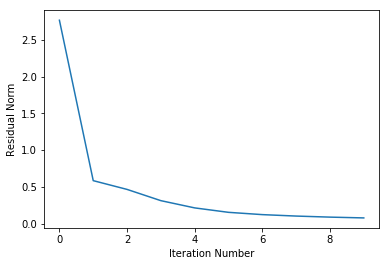

Original matrix:
[[1.323426   1.11061189 1.69137835 1.20020115 1.13216889 0.5980743
  1.64965406 0.340611   1.69871738 0.78278448]
 [1.73721109 1.40464204 1.90898877 1.60774132 1.53717253 0.62647405
  1.76242265 0.41151492 1.8048194  1.20313124]
 [1.4071438  1.10269406 1.75323063 1.18928983 1.23428169 0.60364688
  1.63792853 0.40855006 1.57257432 1.17227344]
 [1.3905141  1.33367163 1.07723947 1.67735654 1.33039096 0.42003169
  1.22641711 0.21470465 1.47350799 0.84931787]
 [1.42153652 1.13598552 2.00816457 1.11463462 1.17914429 0.69942578
  1.90353699 0.45664487 1.81023916 1.09668578]
 [1.60813803 1.23214532 1.73741086 1.3148874  1.27589039 0.40755835
  1.31904948 0.3469129  1.34256526 0.76924618]
 [0.90607895 0.6632877  1.25412229 0.81696721 0.87218892 0.50032884
  1.245879   0.25079329 1.25017792 0.72155621]
 [1.5691922  1.47359672 1.76518996 1.66268312 1.43746574 0.72486628
  1.97409333 0.39239642 2.09234807 1.16325748]
 [1.18723548 1.00282008 1.41532595 1.03836298 0.90382914 0.38460

In [4]:
#
# Plot residuals.
#

import matplotlib.pyplot as plt

# Show plot inline in ipython.
%matplotlib inline

# # Set plot properties.
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# font = {'family' : 'normal',
#         'weight' : 'normal',
#         'size'   : 16}
# plt.rc('font', **font)

#
# Print results.
# #
print('Original matrix:')
print(A)
print('Left factor Y:')
print(Y)
print('Right factor X:')
print(X)
print('Residual A - Y * X:')
print(A - np.matmul(Y, X))
# print('Residual after {} iterations: {}'.format(iter_num, prob.value))

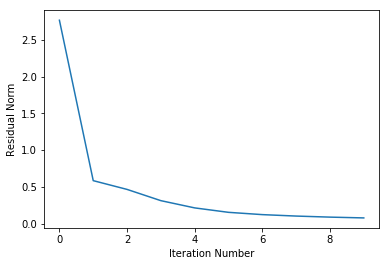

In [9]:
# Create the plot.
plt.plot(residual)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()

In [5]:
X_old = X

In [6]:
Y = Y_init
X = X_old
epoch = 30000
error = np.zeros(epoch)
for iter_num in range(1, 1+epoch):
    X = X*np.matmul(Y.T, A)/np.matmul(np.matmul(Y.T, Y), X)
    Y = Y*np.matmul(A, X.T)/np.matmul(np.matmul(Y, X), X.T)
    error[iter_num-1] = np.sqrt(np.sum(np.square(A - np.matmul(Y, X))))
    if iter_num%1000 == 0:
        print iter_num, ':', error[iter_num-1]

1000 : 0.04874339454933745
2000 : 0.007305469891247044
3000 : 0.003875678022728795
4000 : 0.002983245135389826
5000 : 0.0024216167587593597
6000 : 0.0019970320074012217
7000 : 0.0016584356229062875
8000 : 0.001382259142412542
9000 : 0.0011545556886380895
10000 : 0.0009657514251590225
11000 : 0.0008086766688402613
12000 : 0.0006777080475511637
13000 : 0.0005683287669480846
14000 : 0.0004768640928671217
15000 : 0.0004003015857521533
16000 : 0.0003361592622306081
17000 : 0.00028238464374503997
18000 : 0.0002372755460592903
19000 : 0.00019941700038946658
20000 : 0.00016763051856924431
21000 : 0.00014093298512292326
22000 : 0.00011850315463970175
23000 : 9.965421556231289e-05
24000 : 8.381123049370579e-05
25000 : 7.049252203788758e-05
26000 : 5.929426873119666e-05
27000 : 4.9877725280330115e-05
28000 : 4.1958597175273363e-05
29000 : 3.529819027438325e-05
30000 : 2.9696027335717838e-05


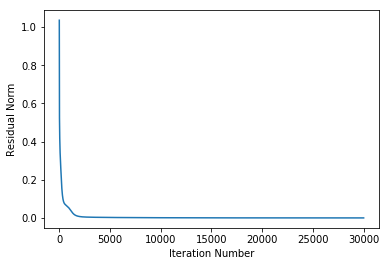

In [7]:
plt.plot(error)
plt.xlabel('Iteration Number')
plt.ylabel('Residual Norm')
plt.show()

In [8]:
print A, '\n', np.matmul(Y, X)

[[1.323426   1.11061189 1.69137835 1.20020115 1.13216889 0.5980743
  1.64965406 0.340611   1.69871738 0.78278448]
 [1.73721109 1.40464204 1.90898877 1.60774132 1.53717253 0.62647405
  1.76242265 0.41151492 1.8048194  1.20313124]
 [1.4071438  1.10269406 1.75323063 1.18928983 1.23428169 0.60364688
  1.63792853 0.40855006 1.57257432 1.17227344]
 [1.3905141  1.33367163 1.07723947 1.67735654 1.33039096 0.42003169
  1.22641711 0.21470465 1.47350799 0.84931787]
 [1.42153652 1.13598552 2.00816457 1.11463462 1.17914429 0.69942578
  1.90353699 0.45664487 1.81023916 1.09668578]
 [1.60813803 1.23214532 1.73741086 1.3148874  1.27589039 0.40755835
  1.31904948 0.3469129  1.34256526 0.76924618]
 [0.90607895 0.6632877  1.25412229 0.81696721 0.87218892 0.50032884
  1.245879   0.25079329 1.25017792 0.72155621]
 [1.5691922  1.47359672 1.76518996 1.66268312 1.43746574 0.72486628
  1.97409333 0.39239642 2.09234807 1.16325748]
 [1.18723548 1.00282008 1.41532595 1.03836298 0.90382914 0.38460446
  1.213473   